## LOOK AT 09 - INS - Ins_IterativeRequests

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

1. Latitude appears to correlate with temperature: the closer a city is to the equator, the higher the temperature. As you move away from the equator - either north or south - the temperature decreases.
2. Latitude does not appear to affect the percentage of cloudiness. Throughout the specturm of latitude, some cities are at 100% cloudiness while others are at 0%.
3. The majority of cities have wind speeds below 20mph but the wind speed does not appear to increase or decrease as one moves north or south in latitude.
4. There are two outliers with exceptionally high humidity (Puerto Maldonado, Peru and Paita, Peru) but aside from those, all other humidity is 100% or less. Humidity is highest at far northern and southern latitudes as well as near the equator (generally between 50% and 100%) and lower around 20 degrees south and 20-40 degrees north.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + api_key + "&q="

In [36]:
#SET UP LISTS FOR DF
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)

Beginning Data Retrieval
-----------------------------
Processing Record 1 | sao gabriel da cachoeira
Processing Record 2 | vaini
Processing Record 3 | salinopolis
Processing Record 4 | rikitea
Processing Record 5 | port alfred
Processing Record 6 | bogorodskoye
Processing Record 7 | bluff
Processing Record 8 | iqaluit
City not found. Skipping...
Processing Record 9 | thompson
Processing Record 10 | albany
City not found. Skipping...
Processing Record 11 | novovasylivka
Processing Record 12 | bandarbeyla
City not found. Skipping...
Processing Record 13 | fortuna
City not found. Skipping...
Processing Record 14 | sao joao da barra
Processing Record 15 | avarua
Processing Record 16 | ulladulla
City not found. Skipping...
Processing Record 17 | lasa
Processing Record 18 | kruisfontein
Processing Record 19 | hilo
Processing Record 20 | goshen
Processing Record 21 | shakiso
Processing Record 22 | tasiilaq
City not found. Skipping...
Processing Record 23 | hermanus
Processing Record 24 | mer

Processing Record 227 | sassandra
Processing Record 228 | ostra
Processing Record 229 | lagoa
Processing Record 230 | borogontsy
Processing Record 231 | marevo
Processing Record 232 | alekseyevsk
Processing Record 233 | isperih
Processing Record 234 | daro
Processing Record 235 | north bend
Processing Record 236 | bria
Processing Record 237 | san francisco
Processing Record 238 | bruck an der leitha
Processing Record 239 | peniche
Processing Record 240 | mirabad
Processing Record 241 | chukhloma
Processing Record 242 | porto novo
Processing Record 243 | vagur
Processing Record 244 | boa vista
City not found. Skipping...
Processing Record 245 | anadyr
Processing Record 246 | mossendjo
Processing Record 247 | vostok
Processing Record 248 | nyurba
Processing Record 249 | kaoma
Processing Record 250 | namwala
Processing Record 251 | salitral
Processing Record 252 | oriximina
City not found. Skipping...
Processing Record 253 | leshukonskoye
Processing Record 254 | cruzeiro do sul
Processing

Processing Record 455 | ocampo
Processing Record 456 | longyan
Processing Record 457 | cananeia
Processing Record 458 | vestmannaeyjar
Processing Record 459 | belomorsk
Processing Record 460 | waingapu
Processing Record 461 | port augusta
Processing Record 462 | ahipara
Processing Record 463 | buin
Processing Record 464 | hay river
Processing Record 465 | bilibino
Processing Record 466 | srednekolymsk
City not found. Skipping...
City not found. Skipping...
Processing Record 467 | pitimbu
Processing Record 468 | vigrestad
City not found. Skipping...
Processing Record 469 | pokrovsk
Processing Record 470 | barra do garcas
Processing Record 471 | nokha
Processing Record 472 | djambala
Processing Record 473 | nuuk
Processing Record 474 | marsa matruh
Processing Record 475 | nantucket
Processing Record 476 | marsaxlokk
Processing Record 477 | townsville
Processing Record 478 | jutai
City not found. Skipping...
Processing Record 479 | kununurra
Processing Record 480 | podosinovets
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
city_data = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

city_data.to_csv("city_data.csv")

city_data.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

In [57]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sao Gabriel da Cachoeira,75,BR,1562609072,83,-0.13,-67.09,77.00,4.70
1,Vaini,94,IN,1562609073,85,15.34,74.49,78.94,11.88
2,Salinopolis,28,BR,1562609075,78,-0.61,-47.36,81.46,15.77
3,Rikitea,100,PF,1562609076,93,-23.12,-134.97,71.20,18.12
4,Port Alfred,74,ZA,1562609077,70,-33.59,26.89,64.00,5.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

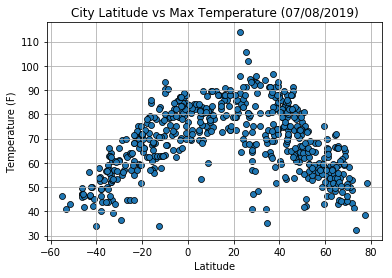

In [47]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("LatitudeTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

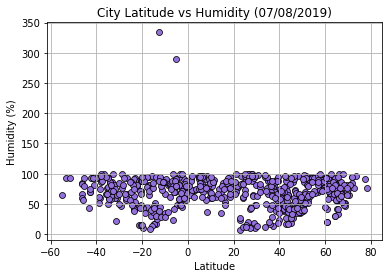

In [44]:
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", linewidth = .75, color="mediumpurple")
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

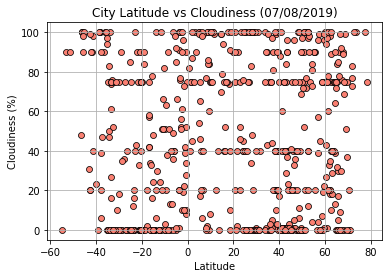

In [45]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

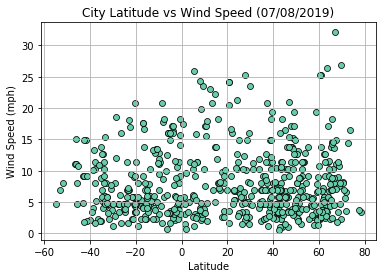

In [46]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()